In [1]:
import sys
sys.path.append('sources')

## Process Generation

This notebook demonstrates how to generate and visualize a control process from a structured expression. The workflow includes:

1. **Process String Generation**:
   - Retrieves a process expression from pre-generated files
   - Uses parameters `x` and `y` to specify complexity (max_nested_xor and max_independent_xor)
   - Selects a specific process using line number `z`

2. **CPI Translation**:
   - Converts the process string into a Control Process Interface (CPI) dictionary
   - Configurable parameters include:
     - `choice_distribution`: Probability of XOR nodes being choices vs. nature nodes
     - `duration_interval`: Range for task durations
     - `num_impacts`: Number of impact metrics per task
     - `vector_generation_mode`: Strategy for generating impact values

Process string: (((T1 , T2) ^ (((T3 ^ T4) , T5) , (T6 ^ T7))) || ((((T8 || T9) || (T10 , (T11 || T12))) , (((T13 ^ T14) , T15) ^ T16)) , (T17 || (T18 ^ T19))))

Generated CPI structure:
{
  "type": "parallel",
  "id": 0,
  "first_split": {
    "type": "choice",
    "id": 1,
    "true": {
      "type": "sequence",
      "id": 2,
      "head": {
        "type": "task",
        "id": 3,
        "duration": 5,
        "impacts": {
          "impact_1": 0.6536587640403465,
          "impact_2": 0.645580833682231,
          "impact_3": 0.3554592627210913
        }
      },
      "tail": {
        "type": "task",
        "id": 4,
        "duration": 4,
        "impacts": {
          "impact_1": 0.521208559671546,
          "impact_2": 0.1524810468537653,
          "impact_3": 0.36605032083581246
        }
      }
    },
    "false": {
      "type": "sequence",
      "id": 5,
      "head": {
        "type": "sequence",
        "id": 6,
        "head": {
          "type": "choice",
          "i

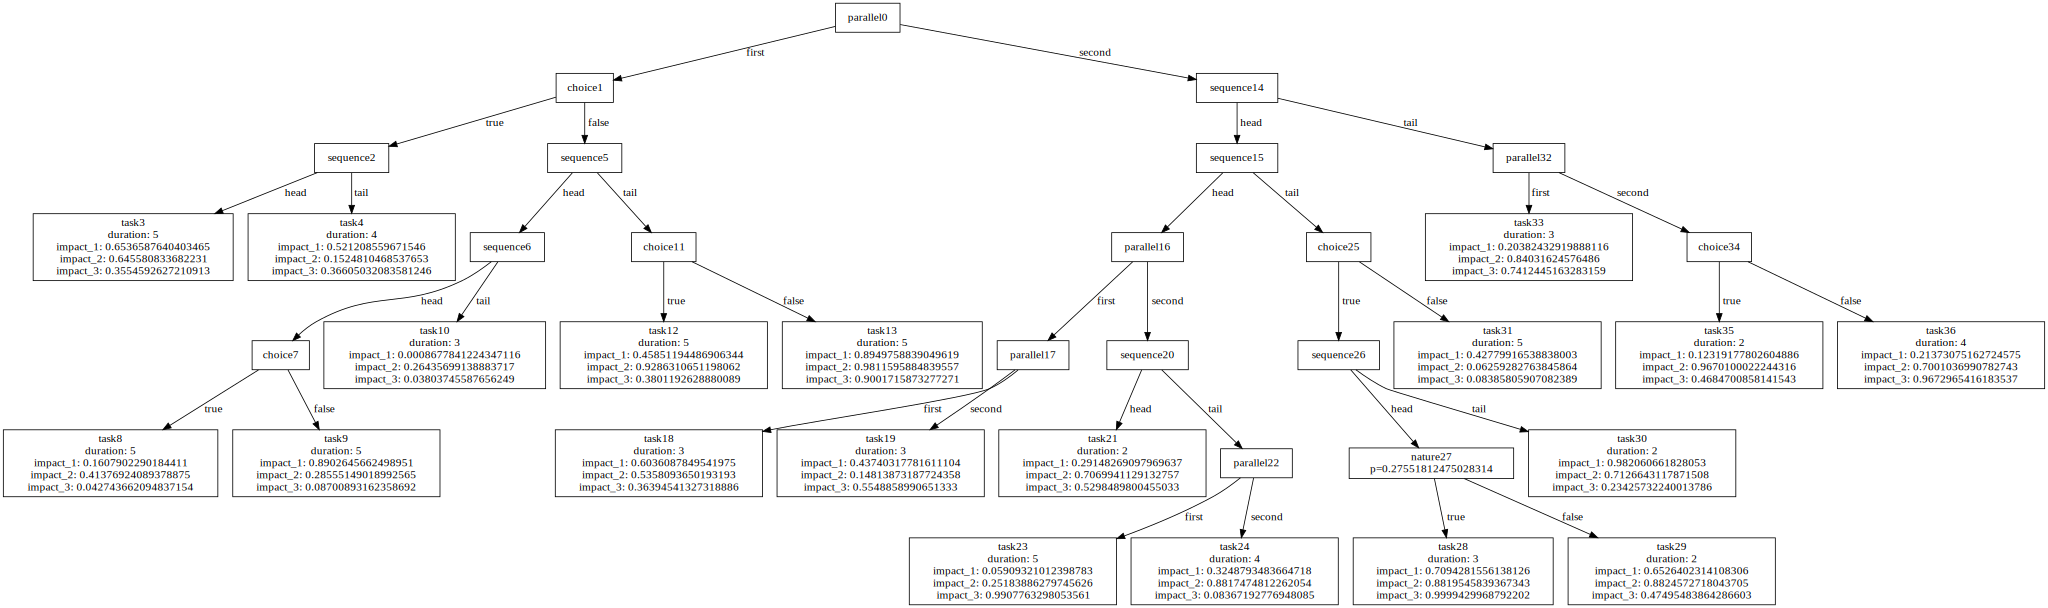

In [2]:
# This script demonstrates how to generate a CPI structure from a process string

from process_visualization import process_to_dot
from IPython.display import display
from graphviz import Source
from generated_processes import get_process_from_file
from generated_processes import translate_to_cpi
import json

# Read process from file - let's get the 3rd line (index 2)
x, y = 2, 4  # max_nested_xor = 2, max_independent_xor = 4
z = 3  # line number (1-based)
process_str = get_process_from_file(x, y, z)
print(f"Process string: {process_str}")

# Set parameters for CPI translation
params = {
    "choice_distribution": 0.6,  # 60% chance of choice vs nature
    "duration_interval": (2, 5),  # Task durations between 2 and 5
    "num_impacts": 3,  # Generate 3 impacts per task
    "vector_generation_mode": "random"  # Use random mode for impact generation
}

# Convert to CPI
cpi_dict = translate_to_cpi(process_str, **params)

# Display the CPI structure
print("\nGenerated CPI structure:")
print(json.dumps(cpi_dict, indent=2))

# Visualize the process
dot_graph = process_to_dot(cpi_dict)
display(Source(dot_graph))


# Generate CPI Bundles
In this step, we'll generate Control Process Interface (CPI) bundles that efficiently store multiple process variations. Each bundle combines CPIs for a specific (x,y) pair with all their parameter combinations.

## Parameter Space
Default ranges for parameter combinations:
- Process structure parameters (x, y from 1 to 10)
- Process variations (z from 1 to 10)
- Impact dimensions (1 to 10)
- Choice distributions (0.1 to 0.9)
- Generation modes:
  - random
  - bagging_divide
  - bagging_remove
  - bagging_remove_divide
  - bagging_remove_reverse
  - bagging_remove_reverse_divide
- Fixed duration interval (1, 10)

## Bundle Storage
Generated bundles are stored in compressed format:
- Location: 'CPIs' directory
- File naming pattern: `cpi_bundle_x<x>_y<y>.cpis.gz`
- Format: Gzipped JSON containing an array of CPI dictionaries
- Each CPI includes metadata about its generation parameters


In [ ]:
# Generate CPI files

from generate_cpi import generate_cpi_files_parametrized
generate_cpi_files_parametrized()

## Note
The repository is self contained as source processes from the `generated_processes` folder are included, however these can be generated with custom preferences as explained in the GitHub repository: [PietroSala/process-impact-benchmarks](https://nbviewer.org/github/PietroSala/process-impact-benchmarks/blob/main/main.ipynb)